Dataset Shape: (50, 7)
   Mthly_HH_Income  Mthly_HH_Expense  No_of_Fly_Members  Emi_or_Rent_Amt  \
0             5000              8000                  3             2000   
1             6000              7000                  2             3000   
2            10000              4500                  2                0   
3            10000              2000                  1                0   
4            12500             12000                  2             3000   

   Annual_HH_Income Highest_Qualified_Member  No_of_Earning_Members  
0             64200           Under-Graduate                      1  
1             79920               Illiterate                      1  
2            112800           Under-Graduate                      1  
3             97200               Illiterate                      1  
4            147000                 Graduate                      1  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (t

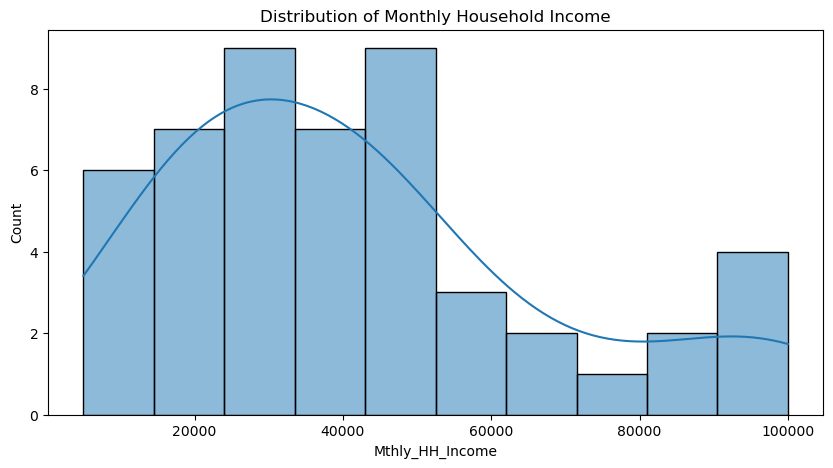

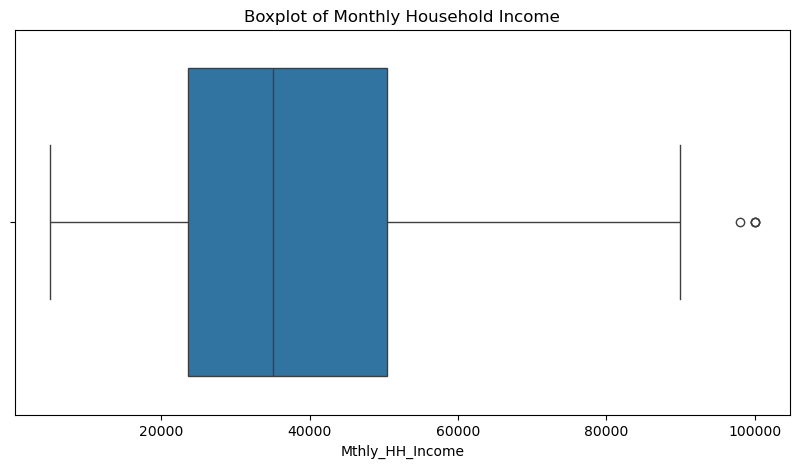

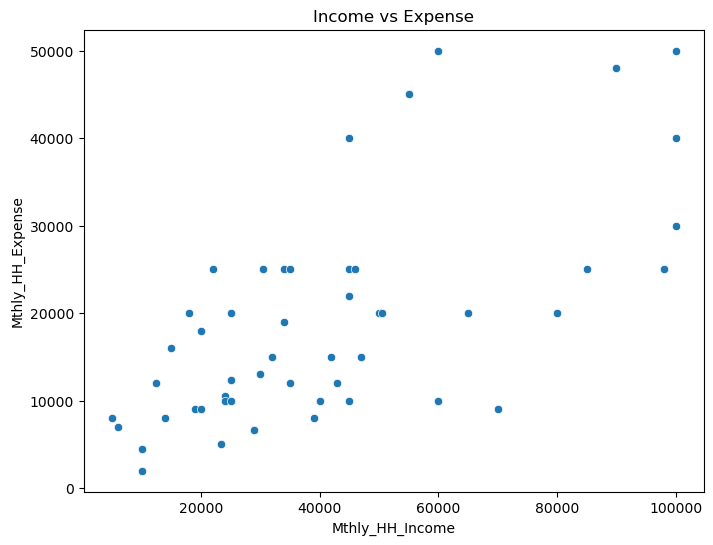

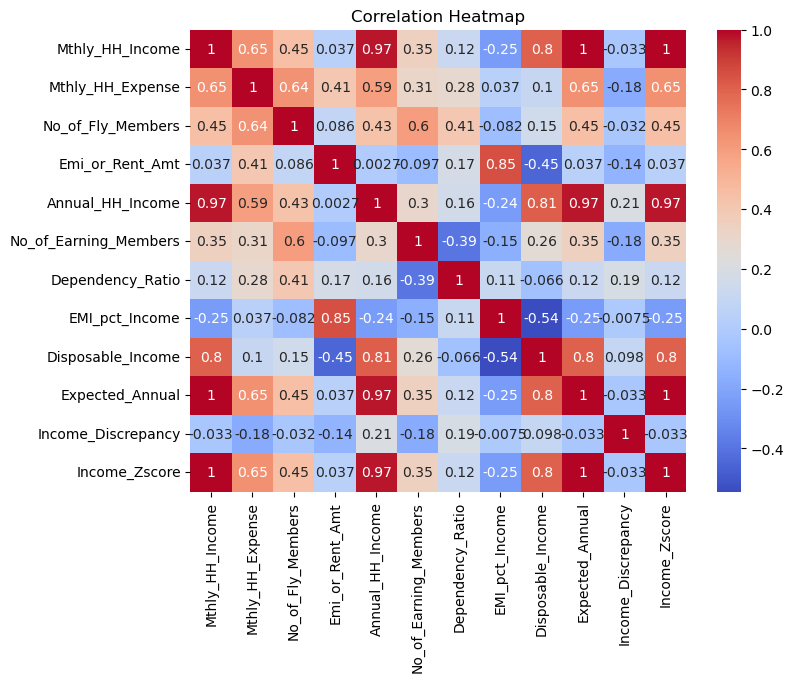

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
%matplotlib inline


df = pd.read_csv("Inc_Exp_Data.csv")
print("Dataset Shape:", df.shape)
print(df.head())


print("\nDataset Info:")
print(df.info())

print("\nDescriptive Statistics:")
print(df.describe(include="all"))

print("\nMissing Values:")
print(df.isnull().sum())


mean_income = df['Mthly_HH_Income'].mean()
median_income = df['Mthly_HH_Income'].median()
mode_income = df['Mthly_HH_Income'].mode()[0]

mean_expense = df['Mthly_HH_Expense'].mean()
median_expense = df['Mthly_HH_Expense'].median()

print("\nMean Income:", mean_income)
print("Median Income:", median_income)
print("Mode Income:", mode_income)
print("Mean Expense:", mean_expense)
print("Median Expense:", median_expense)

income_range = df['Mthly_HH_Income'].max() - df['Mthly_HH_Income'].min()
var_income = df['Mthly_HH_Income'].var()
std_income = df['Mthly_HH_Income'].std()

Q1 = df['Mthly_HH_Income'].quantile(0.25)
Q3 = df['Mthly_HH_Income'].quantile(0.75)
IQR = Q3 - Q1

print("\nIncome Range:", income_range)
print("Variance of Income:", var_income)
print("Standard Deviation of Income:", std_income)
print("IQR:", IQR)

avg_members = df['No_of_Fly_Members'].mean()
std_members = df['No_of_Fly_Members'].std()

print("\nAverage Family Members:", avg_members)
print("Std Dev of Family Members:", std_members)

df['Dependency_Ratio'] = (df['No_of_Fly_Members'] - df['No_of_Earning_Members']) / df['No_of_Fly_Members']
highest_dependency = df.loc[df['Dependency_Ratio'].idxmax()]
print("\nHousehold with Highest Dependency Ratio:\n", highest_dependency)

df['EMI_pct_Income'] = (df['Emi_or_Rent_Amt'] / df['Mthly_HH_Income']) * 100
avg_emi_pct = df['EMI_pct_Income'].mean()

print("\nAverage EMI % of Income:", avg_emi_pct)

high_emi_households = df[df['EMI_pct_Income'] > 40]
print("\nHouseholds with EMI > 40%:\n", high_emi_households)

df['Disposable_Income'] = df['Mthly_HH_Income'] - df['Mthly_HH_Expense'] - df['Emi_or_Rent_Amt']
lowest_disposable = df.loc[df['Disposable_Income'].idxmin()]
print("\nLowest Disposable Income Household:\n", lowest_disposable)

df['Expected_Annual'] = df['Mthly_HH_Income'] * 12
df['Income_Discrepancy'] = df['Annual_HH_Income'] - df['Expected_Annual']

print("\nAnnual Income Consistency Check:\n", df[['Mthly_HH_Income','Annual_HH_Income','Expected_Annual','Income_Discrepancy']])

avg_income_by_qual = df.groupby('Highest_Qualified_Member')['Mthly_HH_Income'].mean()
print("\nAverage Monthly Income by Qualification:\n", avg_income_by_qual)

df['Income_Zscore'] = zscore(df['Mthly_HH_Income'])
outliers = df[np.abs(df['Income_Zscore']) > 3]
print("\nOutliers in Income:\n", outliers)

corr_income_expense = df['Mthly_HH_Income'].corr(df['Mthly_HH_Expense'])
corr_earning_income = df['No_of_Earning_Members'].corr(df['Mthly_HH_Income'])

print("\nCorrelation (Income vs Expense):", corr_income_expense)
print("Correlation (Earning Members vs Income):", corr_earning_income)

plt.figure(figsize=(10,5))
sns.histplot(df['Mthly_HH_Income'], bins=10, kde=True)
plt.title("Distribution of Monthly Household Income")
plt.show()

plt.figure(figsize=(10,5))
sns.boxplot(x=df['Mthly_HH_Income'])
plt.title("Boxplot of Monthly Household Income")
plt.show()

plt.figure(figsize=(8,6))
sns.scatterplot(x='Mthly_HH_Income', y='Mthly_HH_Expense', data=df)
plt.title("Income vs Expense")
plt.show()

plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()